In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.ticker as ticker
from data_utils import persian_text, load_processed

In [93]:
mpl.rcParams['font.family'] = 'Vazir'
sns.set(style="whitegrid", font="Vazir")

df = load_processed()

df.tail(10)

,course_title,course_code,section,unit,professor1,professor2,professor3,capacity,enrolled,location,weekly_schedule,exam_date,notes,warning,year,semester_code,dept_code,department
110319,دستیار آموزشی,25TA0,1,3,خشایار مهرانی,NaN,NaN,0,1,NaN,NaN,,NaN,NaN,1403,3,25,مهندسی برق
110320,امتحان جامع دکترا,26000,1,0,رامین بزرگ مهری بوذرجمهری,NaN,NaN,0,0,NaN,NaN,,NaN,NaN,1403,3,26,مهندسی شیمی و نفت
110321,پیشنهاد پژوهشی,26002,1,0,رامین بزرگ مهری بوذرجمهری,NaN,NaN,0,0,NaN,NaN,,NaN,NaN,1403,3,26,مهندسی شیمی و نفت
110322,سمینار دکتری 2,26006,1,2,رامین بزرگ مهری بوذرجمهری,NaN,NaN,0,1,NaN,NaN,,NaN,NaN,1403,3,26,مهندسی شیمی و نفت
110323,رساله دکتری,26800,1,24,رامین بزرگ مهری بوذرجمهری,NaN,NaN,0,0,NaN,NaN,,NaN,NaN,1403,3,26,مهندسی شیمی و نفت
110324,امتحان جامع دکترا,28000,1,0,NaN,NaN,NaN,0,8,NaN,NaN,,NaN,NaN,1403,3,28,مهندسی مکانیک
110325,امتحان جامع دکتری,44000,1,0,NaN,NaN,NaN,0,5,NaN,NaN,,برای دانشجویان دکتری مدیریت,NaN,1403,3,44,مدیریت و اقتصاد
110326,امتحان جامع دکتری,44000,2,0,NaN,NaN,NaN,0,0,NaN,NaN,,برای دانشجویان دکتری علوم اقتصادی,NaN,1403,3,44,مدیریت و اقتصاد
110327,امتحان جامع دکتری,44000,3,0,NaN,NaN,NaN,0,2,NaN,NaN,,برای دانشجویان دکتری سیاست‌گذاری,NaN,1403,3,44,مدیریت و اقتصاد
110328,رساله دکتری,48100,1,22,راحله محمد پور,NaN,NaN,15,0,NaN,NaN,,NaN,NaN,1403,3,48,پژوهشکده علوم و فن‌آوری نانو


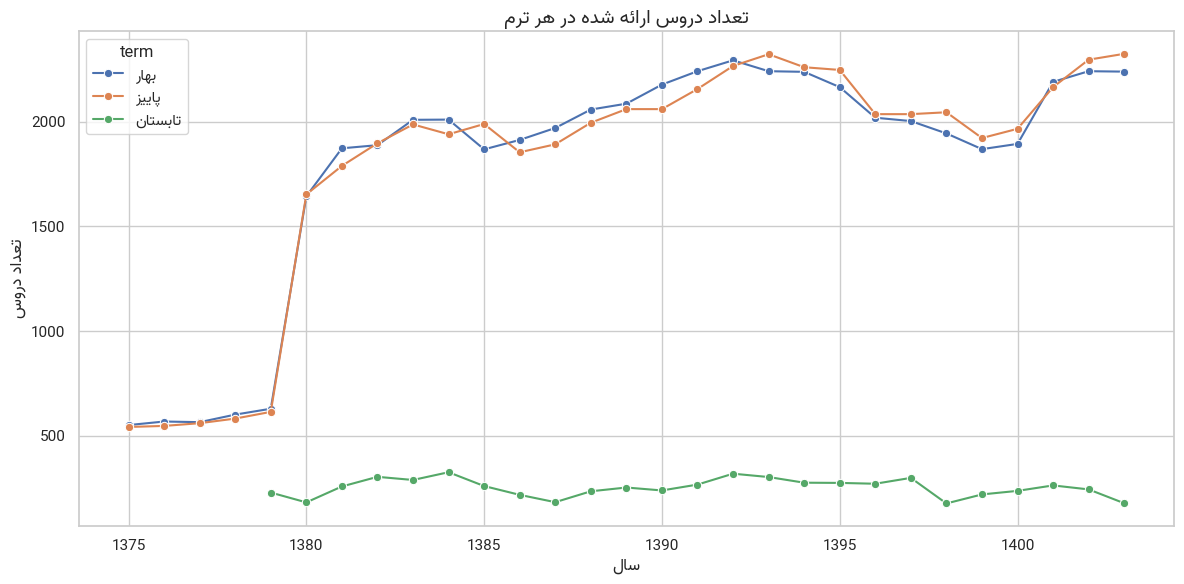

In [94]:
semester_map = {1: persian_text("پاییز"),
                2:persian_text("بهار"), 
                3: persian_text("تابستان")}
df["term"] = df["semester_code"].map(semester_map)

seasonal_trends = df.groupby(["year", "term"])["course_code"].count().reset_index()

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=seasonal_trends, x="year", y="course_code", hue="term", marker="o")

ax.set_title(persian_text("تعداد دروس ارائه شده در هر ترم"), fontsize=14)
ax.set_xlabel(persian_text("سال"), fontsize=12)
ax.set_ylabel(persian_text("تعداد دروس"), fontsize=12)

plt.tight_layout()
plt.show()

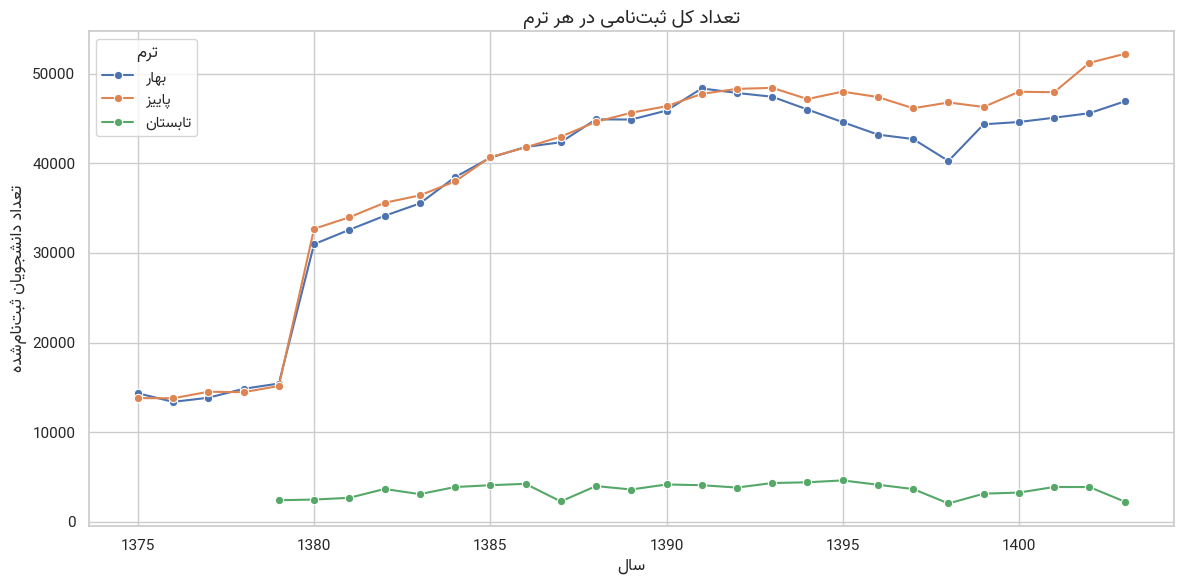

In [95]:
seasonal_enrollment = df.groupby(["year", "term"])["enrolled"].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=seasonal_enrollment, x="year", y="enrolled", hue="term", marker="o")

ax.set_title(persian_text("تعداد کل ثبت‌نامی در هر ترم"), fontsize=14)
ax.set_xlabel(persian_text("سال"), fontsize=12)
ax.set_ylabel(persian_text("تعداد دانشجویان ثبت‌نام‌شده"), fontsize=12)
ax.legend(title=persian_text("ترم"))

plt.tight_layout()
plt.show()

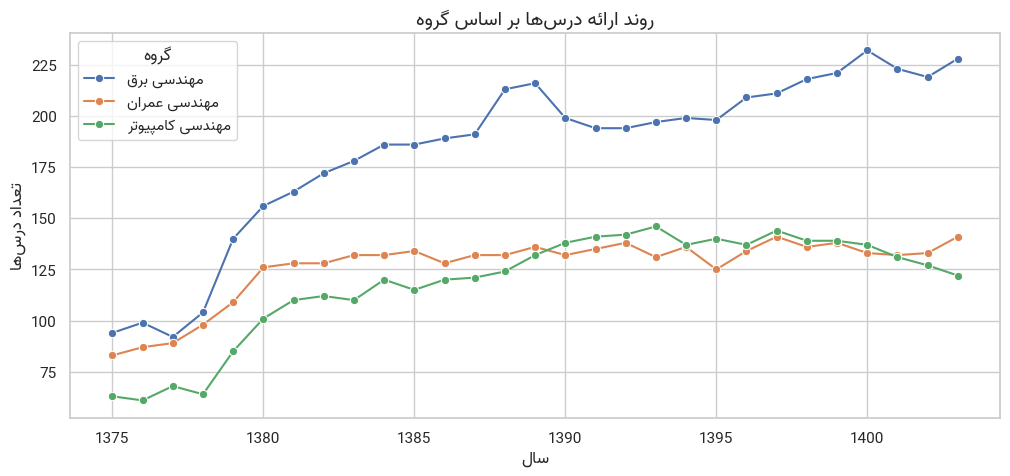

In [96]:
dept_df = df[df["department"].isin(["مهندسی برق", "مهندسی کامپیوتر", "مهندسی عمران"])]
annual_summary = dept_df.groupby(["year", "department"]).agg({
    "enrolled": "sum",
    "course_code": "nunique"
}).reset_index()
annual_summary.rename(columns={"course_code": "num_courses"}, inplace=True)

annual_summary["department_fa"] = annual_summary["department"].apply(persian_text)

plt.figure(figsize=(12,5))
sns.lineplot(data=annual_summary, x="year", y="num_courses", hue="department_fa", marker="o")
plt.title(persian_text("روند ارائه درس‌ها بر اساس گروه"), fontsize=14)
plt.xlabel(persian_text("سال"), fontsize=12)
plt.ylabel(persian_text("تعداد درس‌ها"), fontsize=12)
plt.legend(title=persian_text("گروه"))
plt.show()

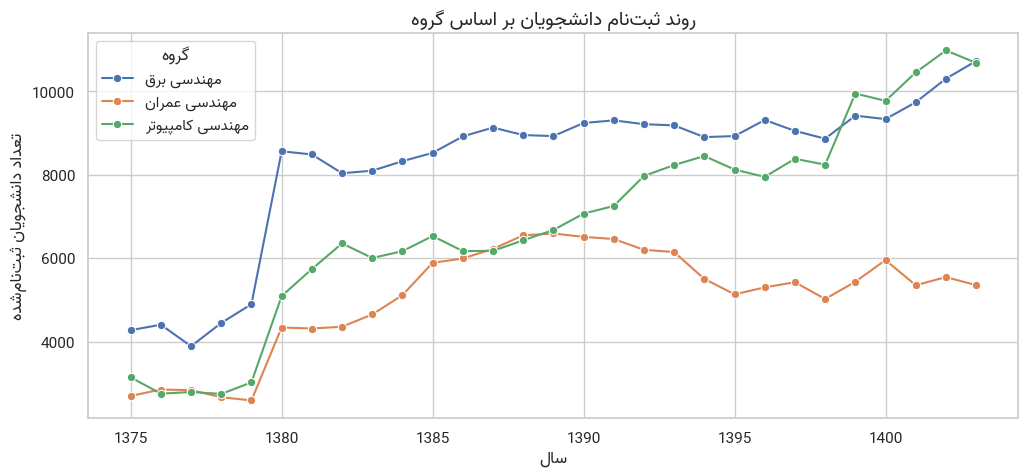

In [97]:
plt.figure(figsize=(12,5))
sns.lineplot(data=annual_summary, x="year", y="enrolled", hue="department_fa", marker="o")
plt.title(persian_text("روند ثبت‌نام دانشجویان بر اساس گروه"), fontsize=14)
plt.xlabel(persian_text("سال"), fontsize=12)
plt.ylabel(persian_text("تعداد دانشجویان ثبت‌نام‌شده"), fontsize=12)
plt.legend(title=persian_text("گروه"))
plt.show()

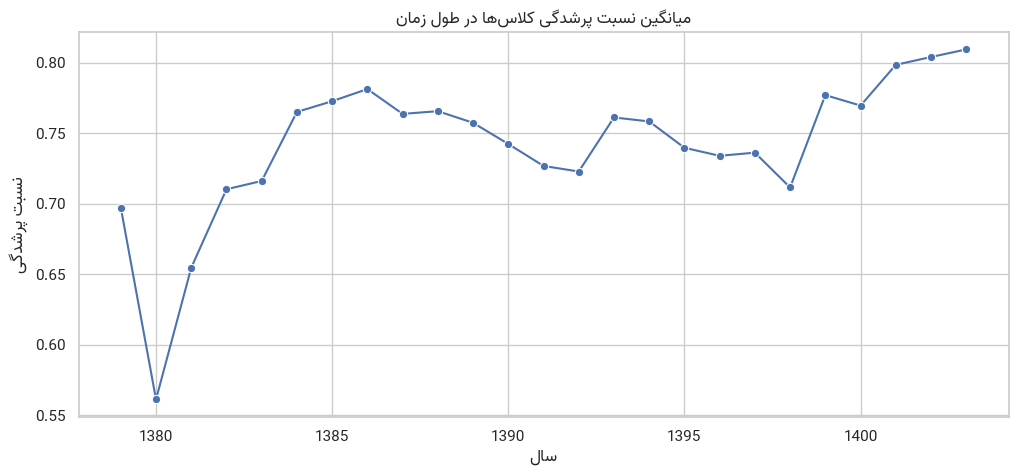

In [98]:
df_clean = df.dropna(subset=["enrolled", "capacity"])

df_clean = df_clean[df_clean["capacity"] > 0]

df_clean = df_clean[df_clean["enrolled"] <= df_clean["capacity"]]

df_clean["utilization"] = df_clean["enrolled"] / df_clean["capacity"]

util_year = df_clean.groupby("year")["utilization"].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=util_year, x="year", y="utilization", marker="o")

plt.title(persian_text("میانگین نسبت پرشدگی کلاس‌ها در طول زمان"))
plt.xlabel(persian_text("سال"))
plt.ylabel(persian_text("نسبت پرشدگی"))
plt.show()

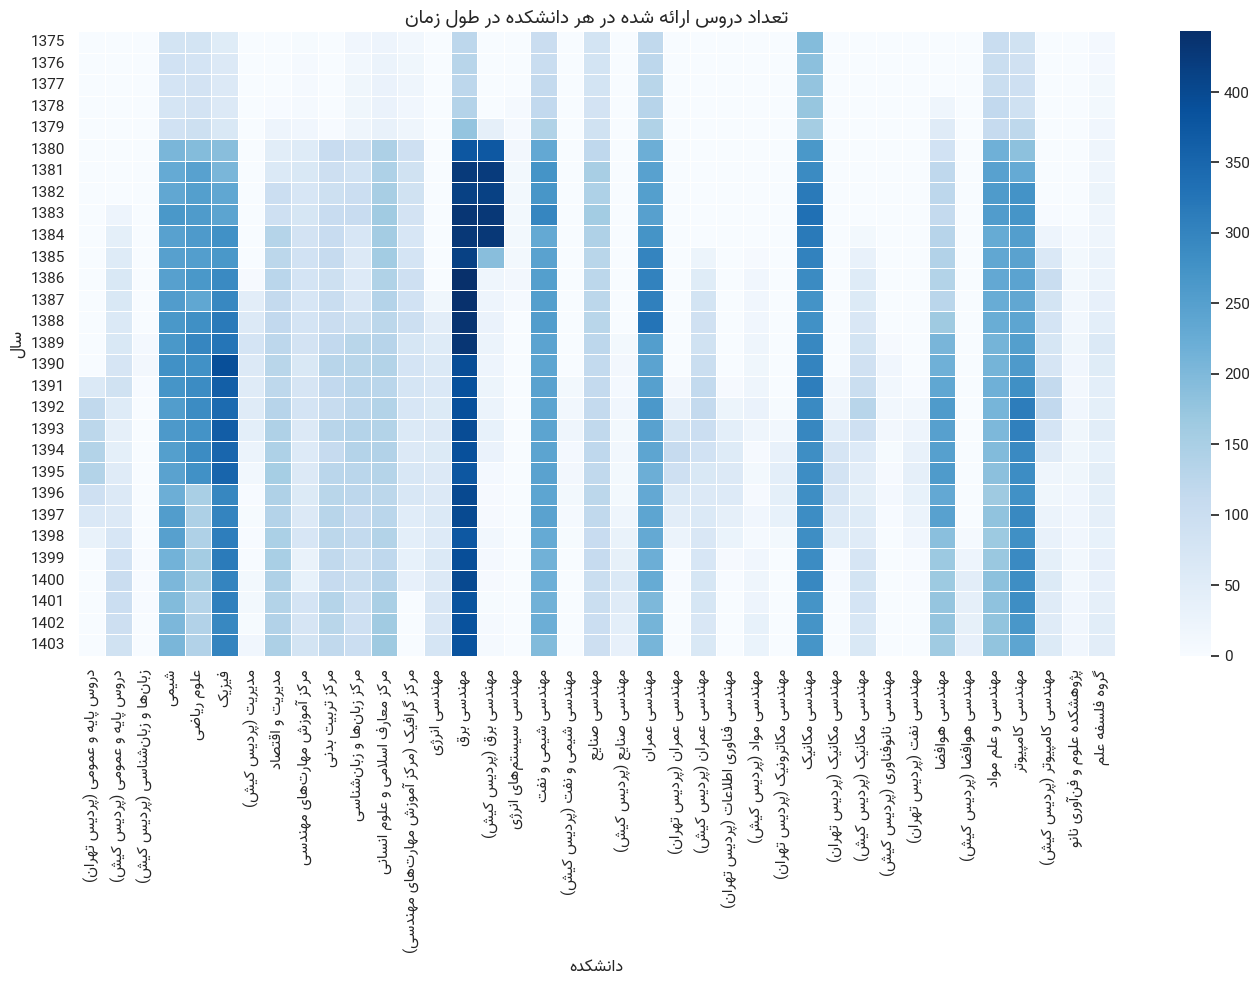

In [107]:
df_filtered = df[(df["unit"] >= 1) & (df["unit"] <= 5)]

heatmap_data = df_filtered.groupby(["year", "department"])["course_code"].count().unstack(fill_value=0)

plt.figure(figsize=(14,10))
ax = sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.5)

ax.set_title(persian_text("تعداد دروس ارائه شده در هر دانشکده در طول زمان"), fontsize=14)
ax.set_ylabel(persian_text("سال"), fontsize=12)
ax.set_xlabel(persian_text("دانشکده"), fontsize=12)

x_labels = [persian_text(str(label)) for label in heatmap_data.columns]
ax.set_xticklabels(x_labels, rotation=90, ha="center")

y_labels = [persian_text(str(label)) for label in heatmap_data.index]
ax.set_yticklabels(y_labels, rotation=0, va="center")

plt.tight_layout()
plt.show()

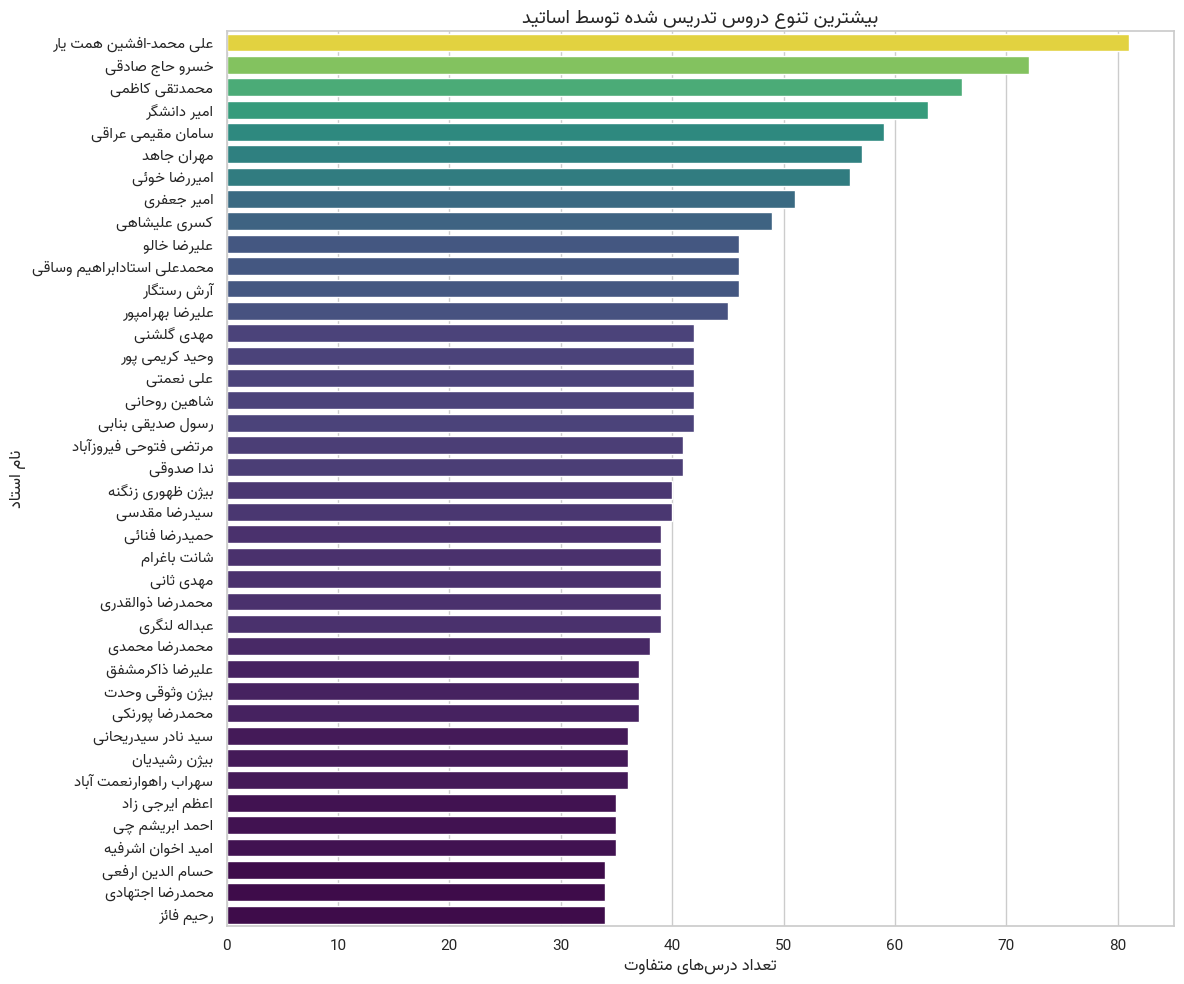

In [108]:
prof_cols = ["professor1", "professor2", "professor3"]

prof_list = []
for col in prof_cols:
    tmp = df_filtered[[col, "course_code"]].dropna()
    tmp = tmp.rename(columns={col: "professor"})
    prof_list.append(tmp)

all_profs = pd.concat(prof_list)
all_profs = all_profs[all_profs["professor"] != ""]


prof_course_diversity = (
    all_profs.groupby("professor")["course_code"]
      .nunique()
      .sort_values(ascending=False)
)

top_diverse = prof_course_diversity.head(40)

plt.figure(figsize=(12,10))
sns.barplot(
    x=top_diverse.values,
    y=[persian_text(name) for name in top_diverse.index],
    hue=top_diverse.values,
    legend=False,
    palette="viridis"
)

plt.xlabel(persian_text("تعداد درس‌های متفاوت"), fontsize=12)
plt.ylabel(persian_text("نام استاد"), fontsize=12)
plt.title(persian_text("بیشترین تنوع دروس تدریس شده توسط اساتید"), fontsize=14)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.tight_layout()
plt.show()

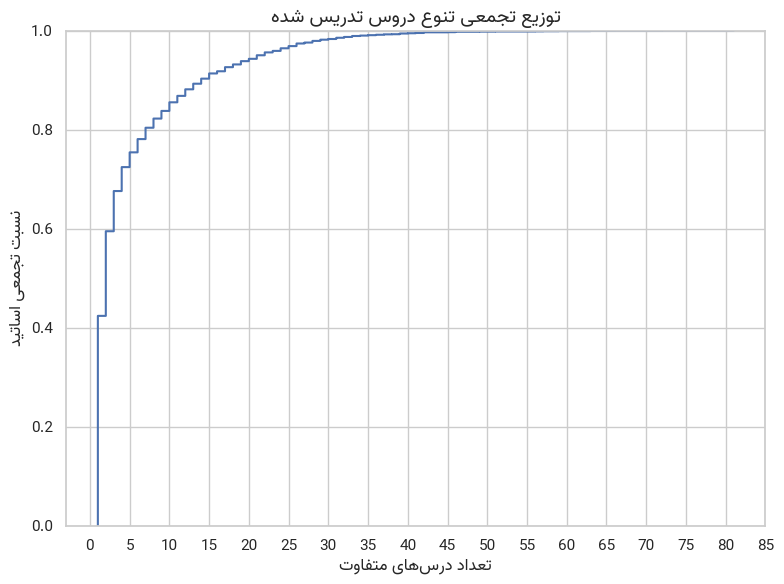

In [101]:
plt.figure(figsize=(8,6))
sns.ecdfplot(prof_course_diversity)
plt.xlabel(persian_text("تعداد درس‌های متفاوت"), fontsize=12)
plt.ylabel(persian_text("نسبت تجمعی اساتید"), fontsize=12)
plt.title(persian_text("توزیع تجمعی تنوع دروس تدریس شده"), fontsize=14)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.tight_layout()
plt.show()

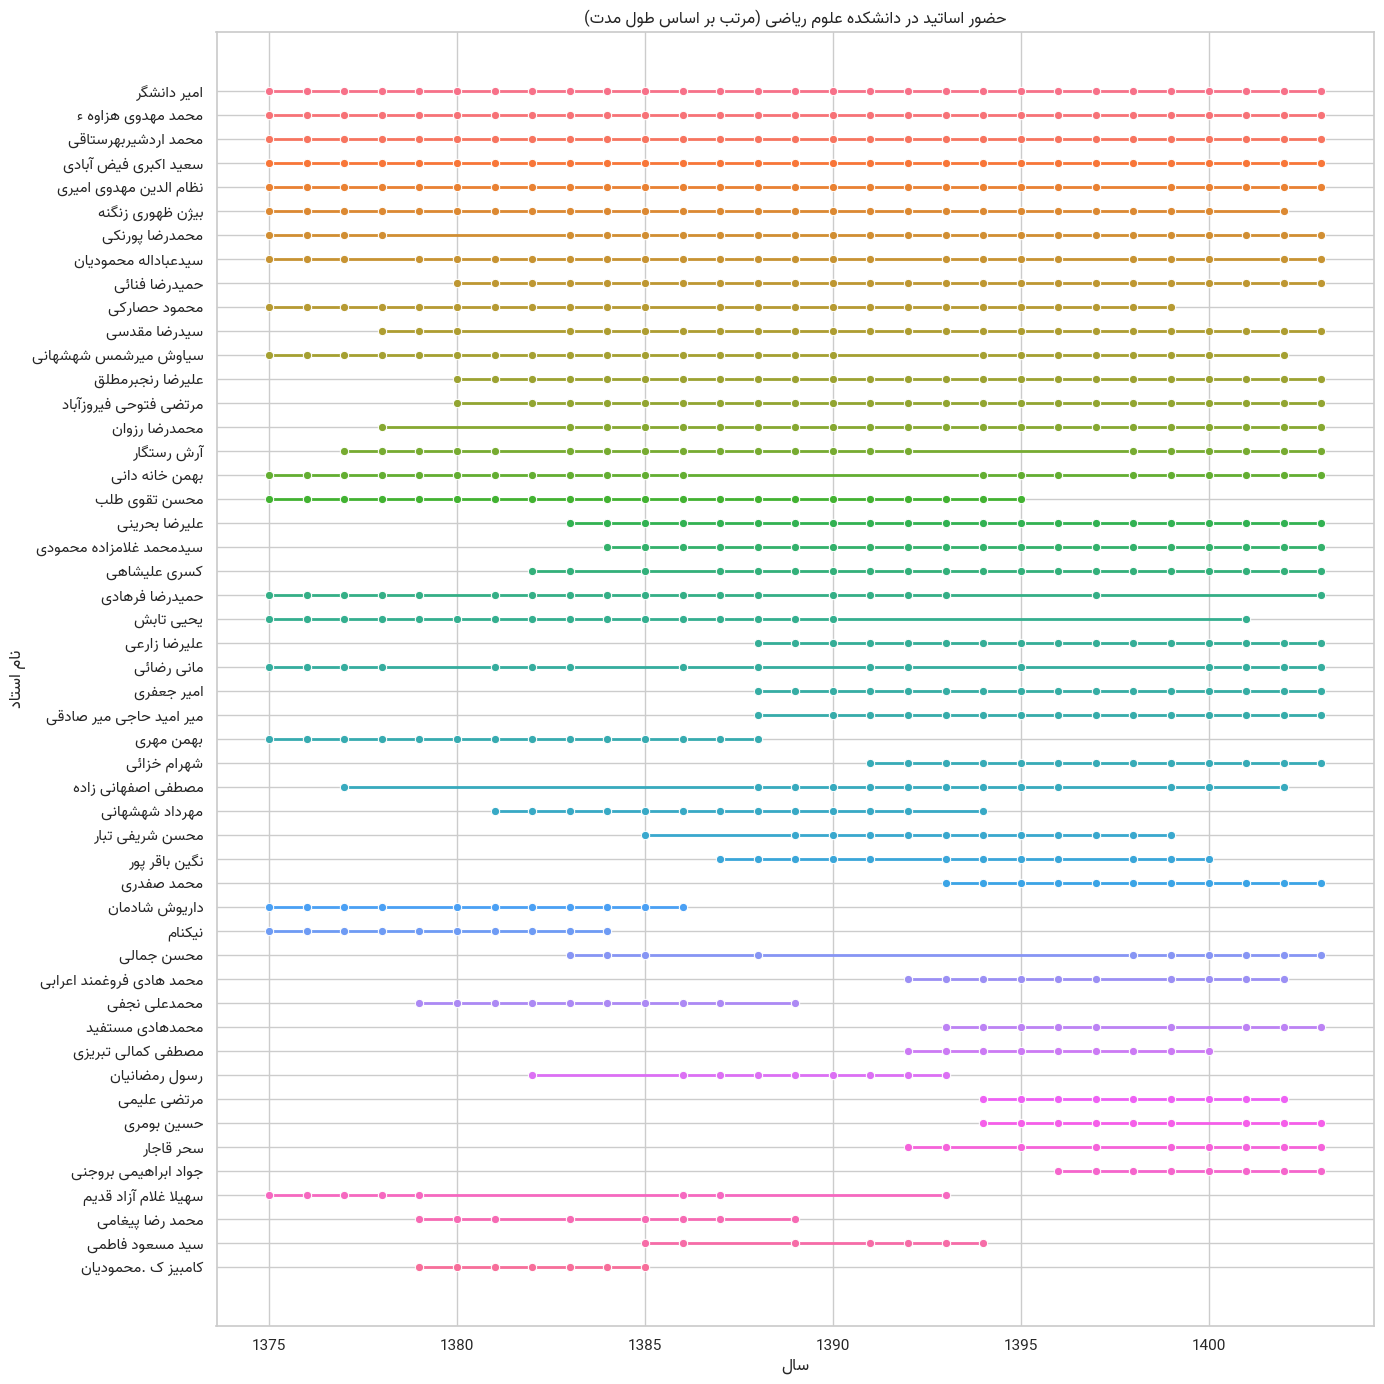

In [102]:
target_dept = "علوم ریاضی"
df_dept = df[df["department"] == target_dept]

prof_cols = ["professor1", "professor2", "professor3"]

prof_years = []
for col in prof_cols:
    tmp = df_dept[["year", col]].dropna()
    tmp = tmp.rename(columns={col: "professor"})
    prof_years.append(tmp)

prof_df = pd.concat(prof_years)
prof_df = prof_df.dropna()
prof_df = prof_df[prof_df["professor"] != ""]

prof_duration = prof_df.groupby("professor")["year"].nunique()

top_professors = prof_duration.sort_values(ascending=False).head(50)
timeline_df = prof_df[prof_df["professor"].isin(top_professors.index)]
timeline_df = timeline_df.drop_duplicates(subset=["professor", "year"])

sorted_professors = top_professors.index.tolist()
timeline_df["professor"] = pd.Categorical(timeline_df["professor"], categories=sorted_professors, ordered=True)

plt.figure(figsize=(14, 14))
sns.lineplot(
    data=timeline_df,
    x="year",
    y="professor",
    hue="professor",
    marker="o",
    linewidth=2,
    legend=False
)

plt.title(persian_text(f"حضور اساتید در دانشکده {target_dept} (مرتب بر اساس طول مدت)"))
plt.xlabel(persian_text("سال"))
plt.ylabel(persian_text("نام استاد"))

y_labels = [persian_text(p) for p in sorted_professors]
plt.yticks(range(len(y_labels)), y_labels)

plt.tight_layout()
plt.show()

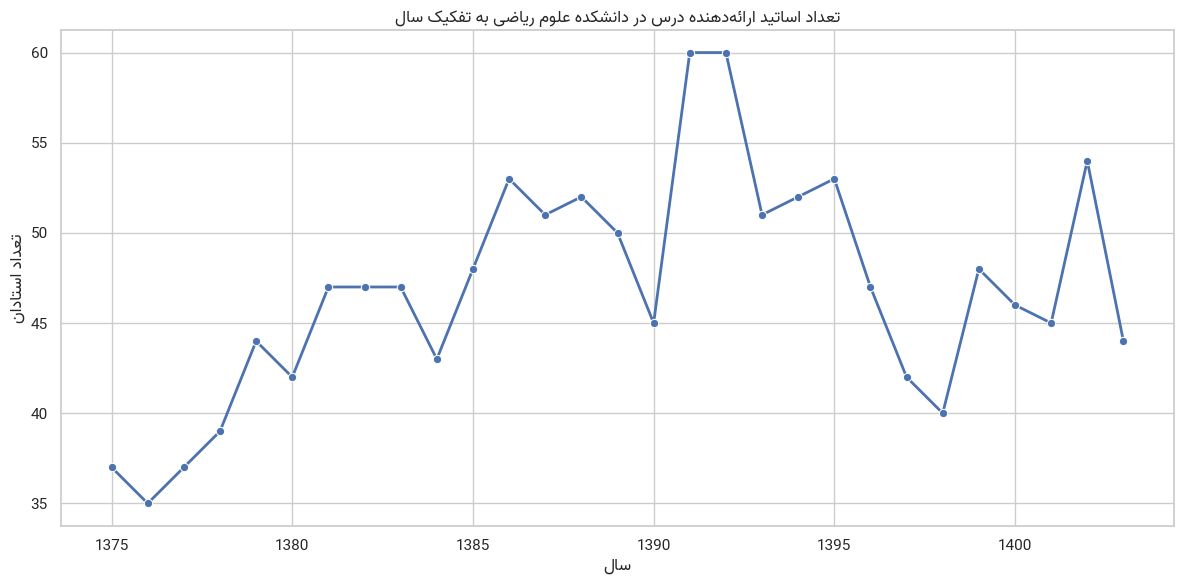

In [103]:
prof_count_per_year = prof_df.groupby("year")["professor"].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=prof_count_per_year, x="year", y="professor", marker="o", linewidth=2)

plt.title(persian_text(f"تعداد اساتید ارائه‌دهنده درس در دانشکده {target_dept} به تفکیک سال"))
plt.xlabel(persian_text("سال"))
plt.ylabel(persian_text("تعداد استادان"))

plt.tight_layout()
plt.show()